In [1]:
input_path = '../Data/Processed_Data/'
output_path = '../Data/Processed_Data/'

In [2]:
import pandas as pd

y = pd.read_csv(input_path+'y_MethylScore.csv', index_col=0)
# y = pd.read_csv(input_path+'y.csv', index_col=0)

In [3]:
y_train = y[~y['Clinical Trial'].isin(['AML02','AML08'])]
#y_train2 = y_train[y_train['os.evnt'].notnull()]
y_test = y[y['Clinical Trial'].isin(['AML02','AML08'])]

y_test.shape, y_train.shape

((204, 299), (1093, 299))

In [4]:
# Import Plotting Functions
from FM_Functions.Data_Visualization import *

In [5]:
score_name = "MethylScore"

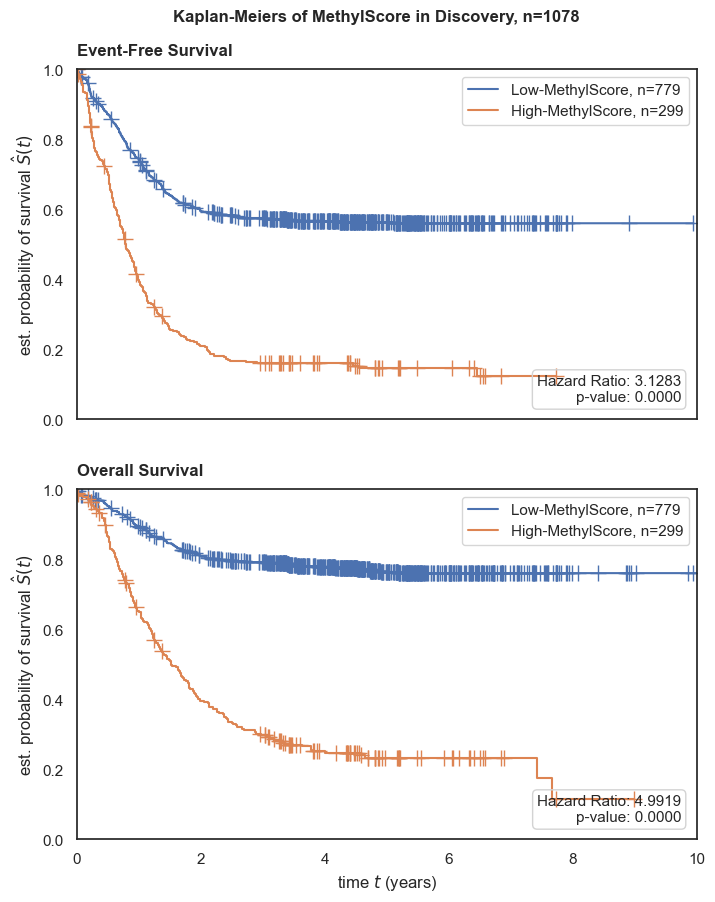

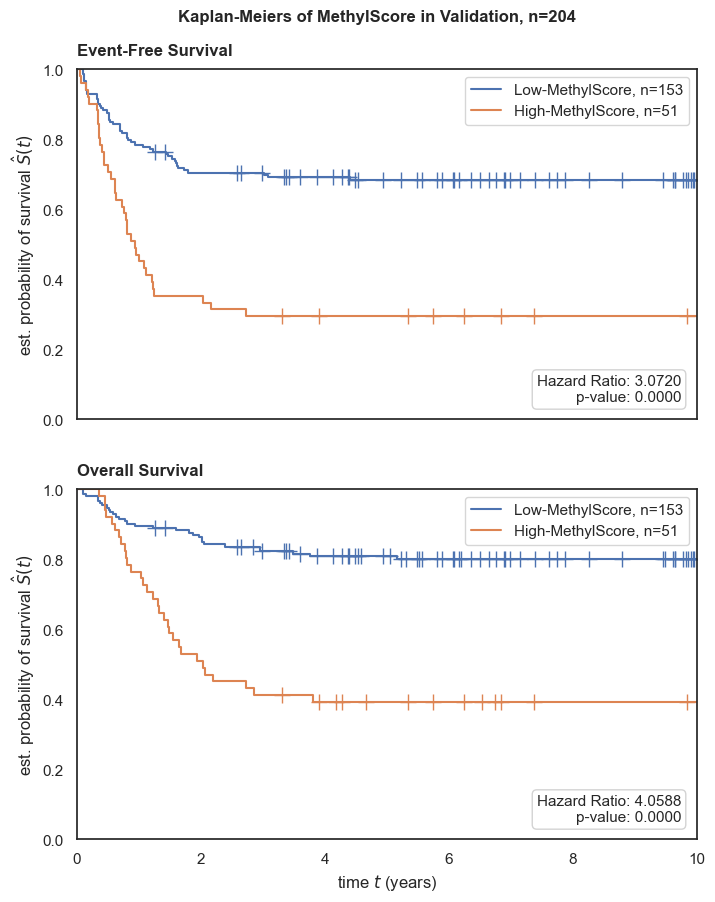

In [6]:
draw_kaplan_meier(scorename=score_name,
                        df=y_train[~y_train['Clinical Trial'].isin(['AML02','AML08','AML05'])],
                        save_plot=True,
                        add_risk_counts=False,
                        trialname='Discovery')

draw_kaplan_meier(scorename=score_name,
                        df=y_test,
                        save_plot=True,
                        add_risk_counts=False,
                        trialname='Validation')

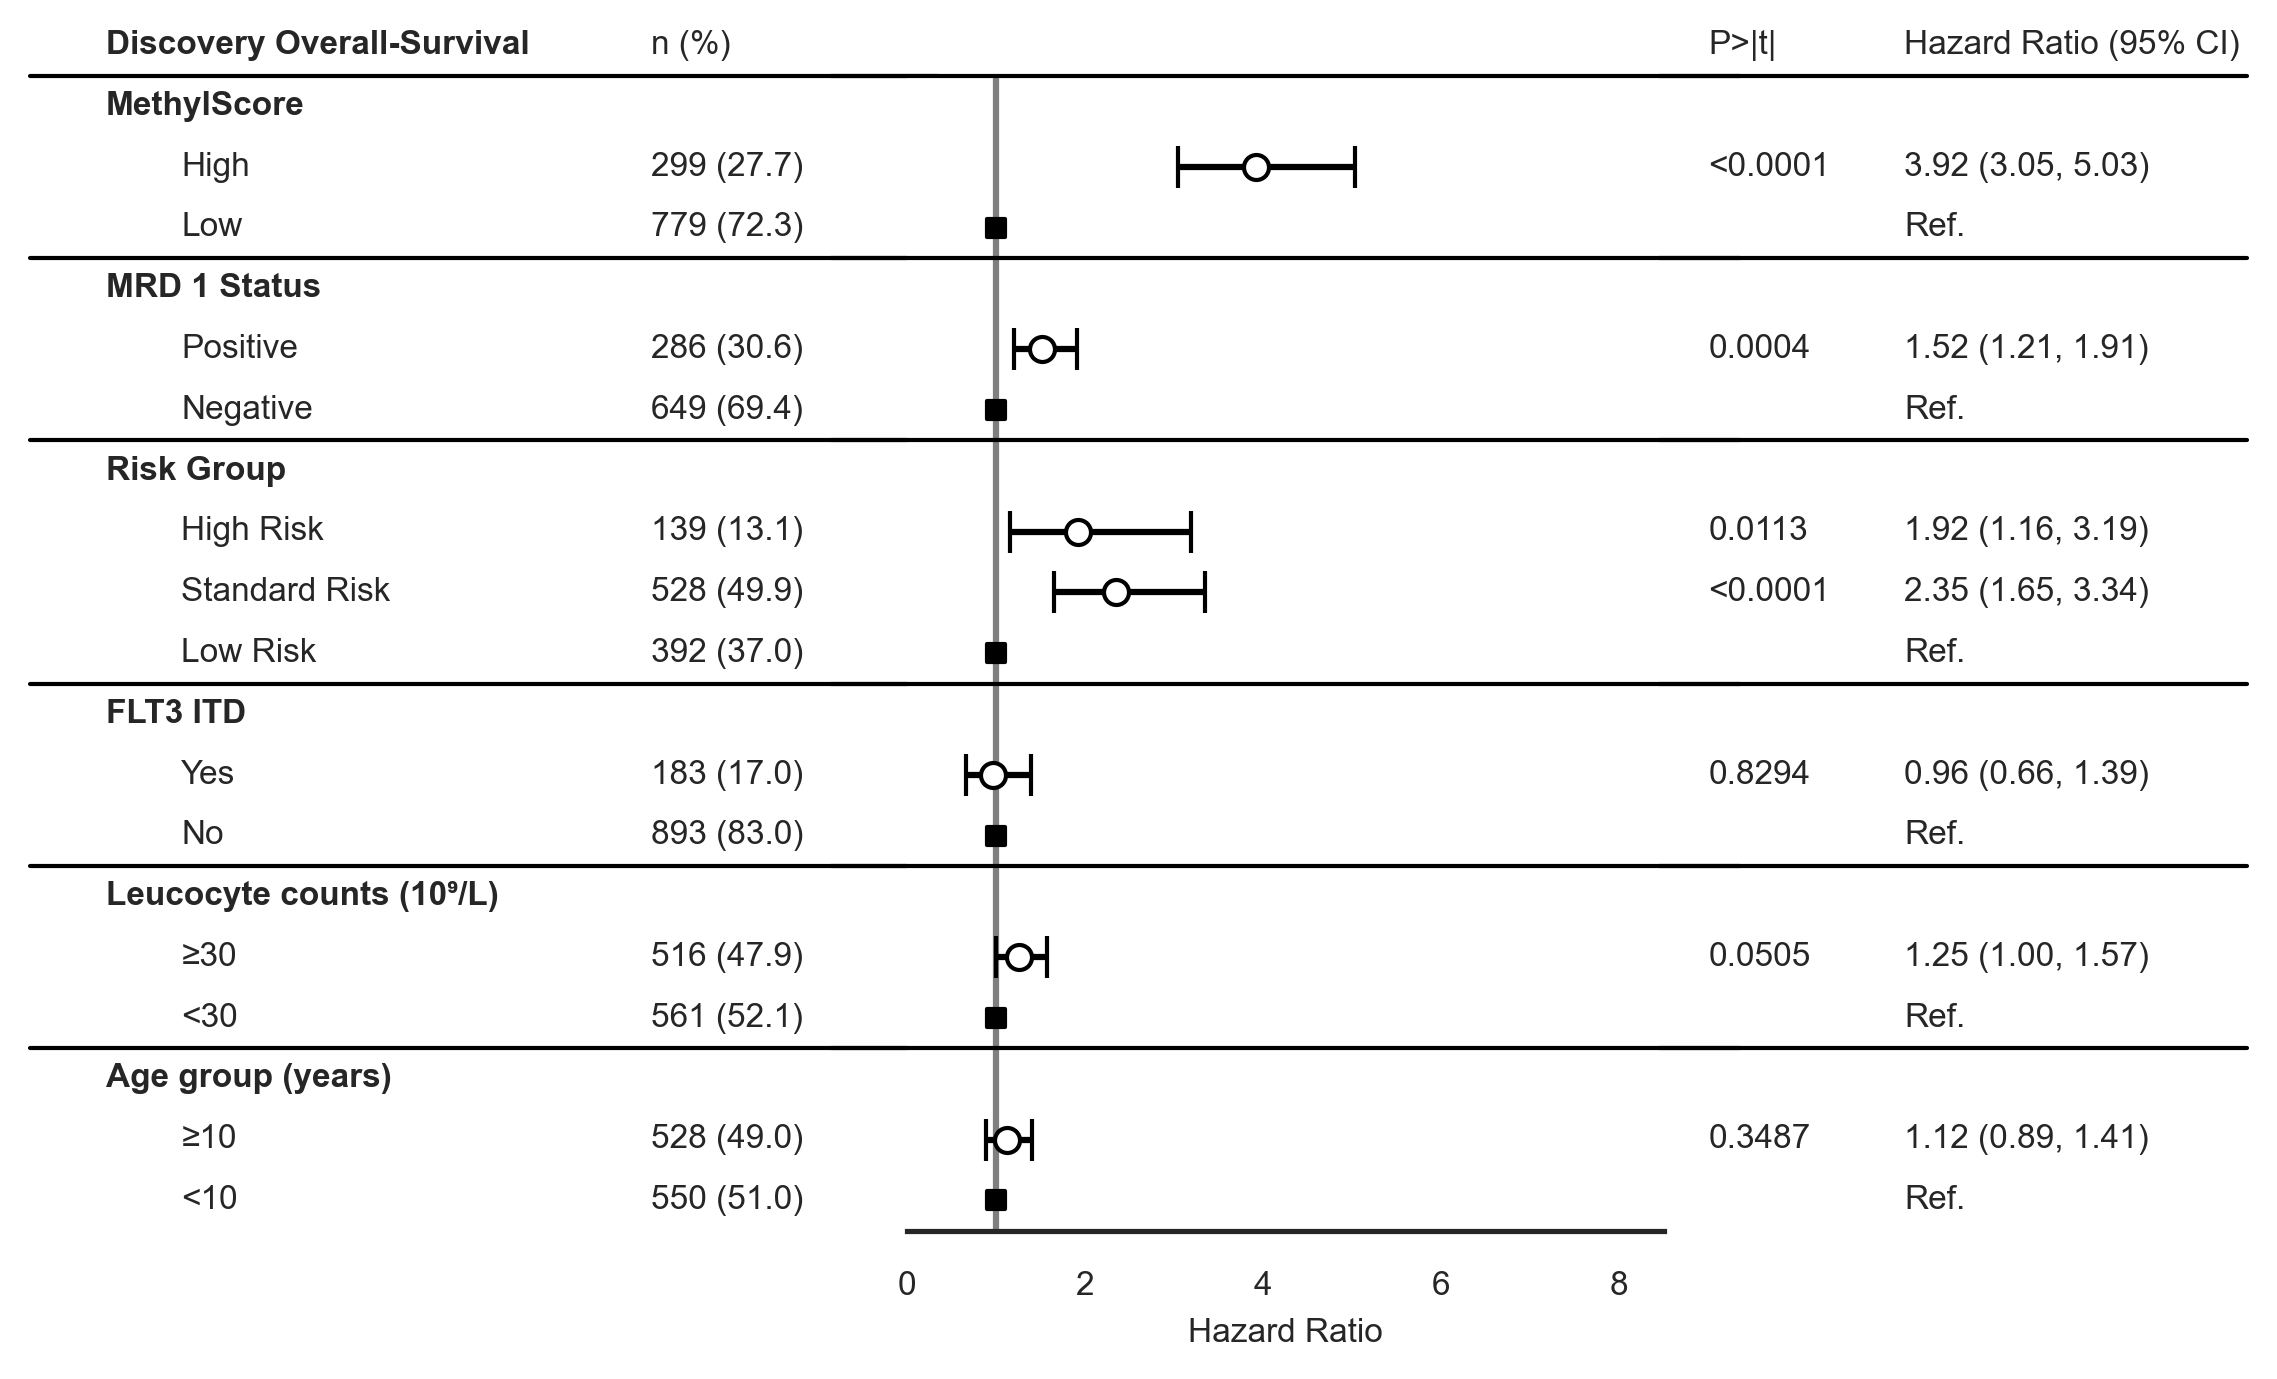

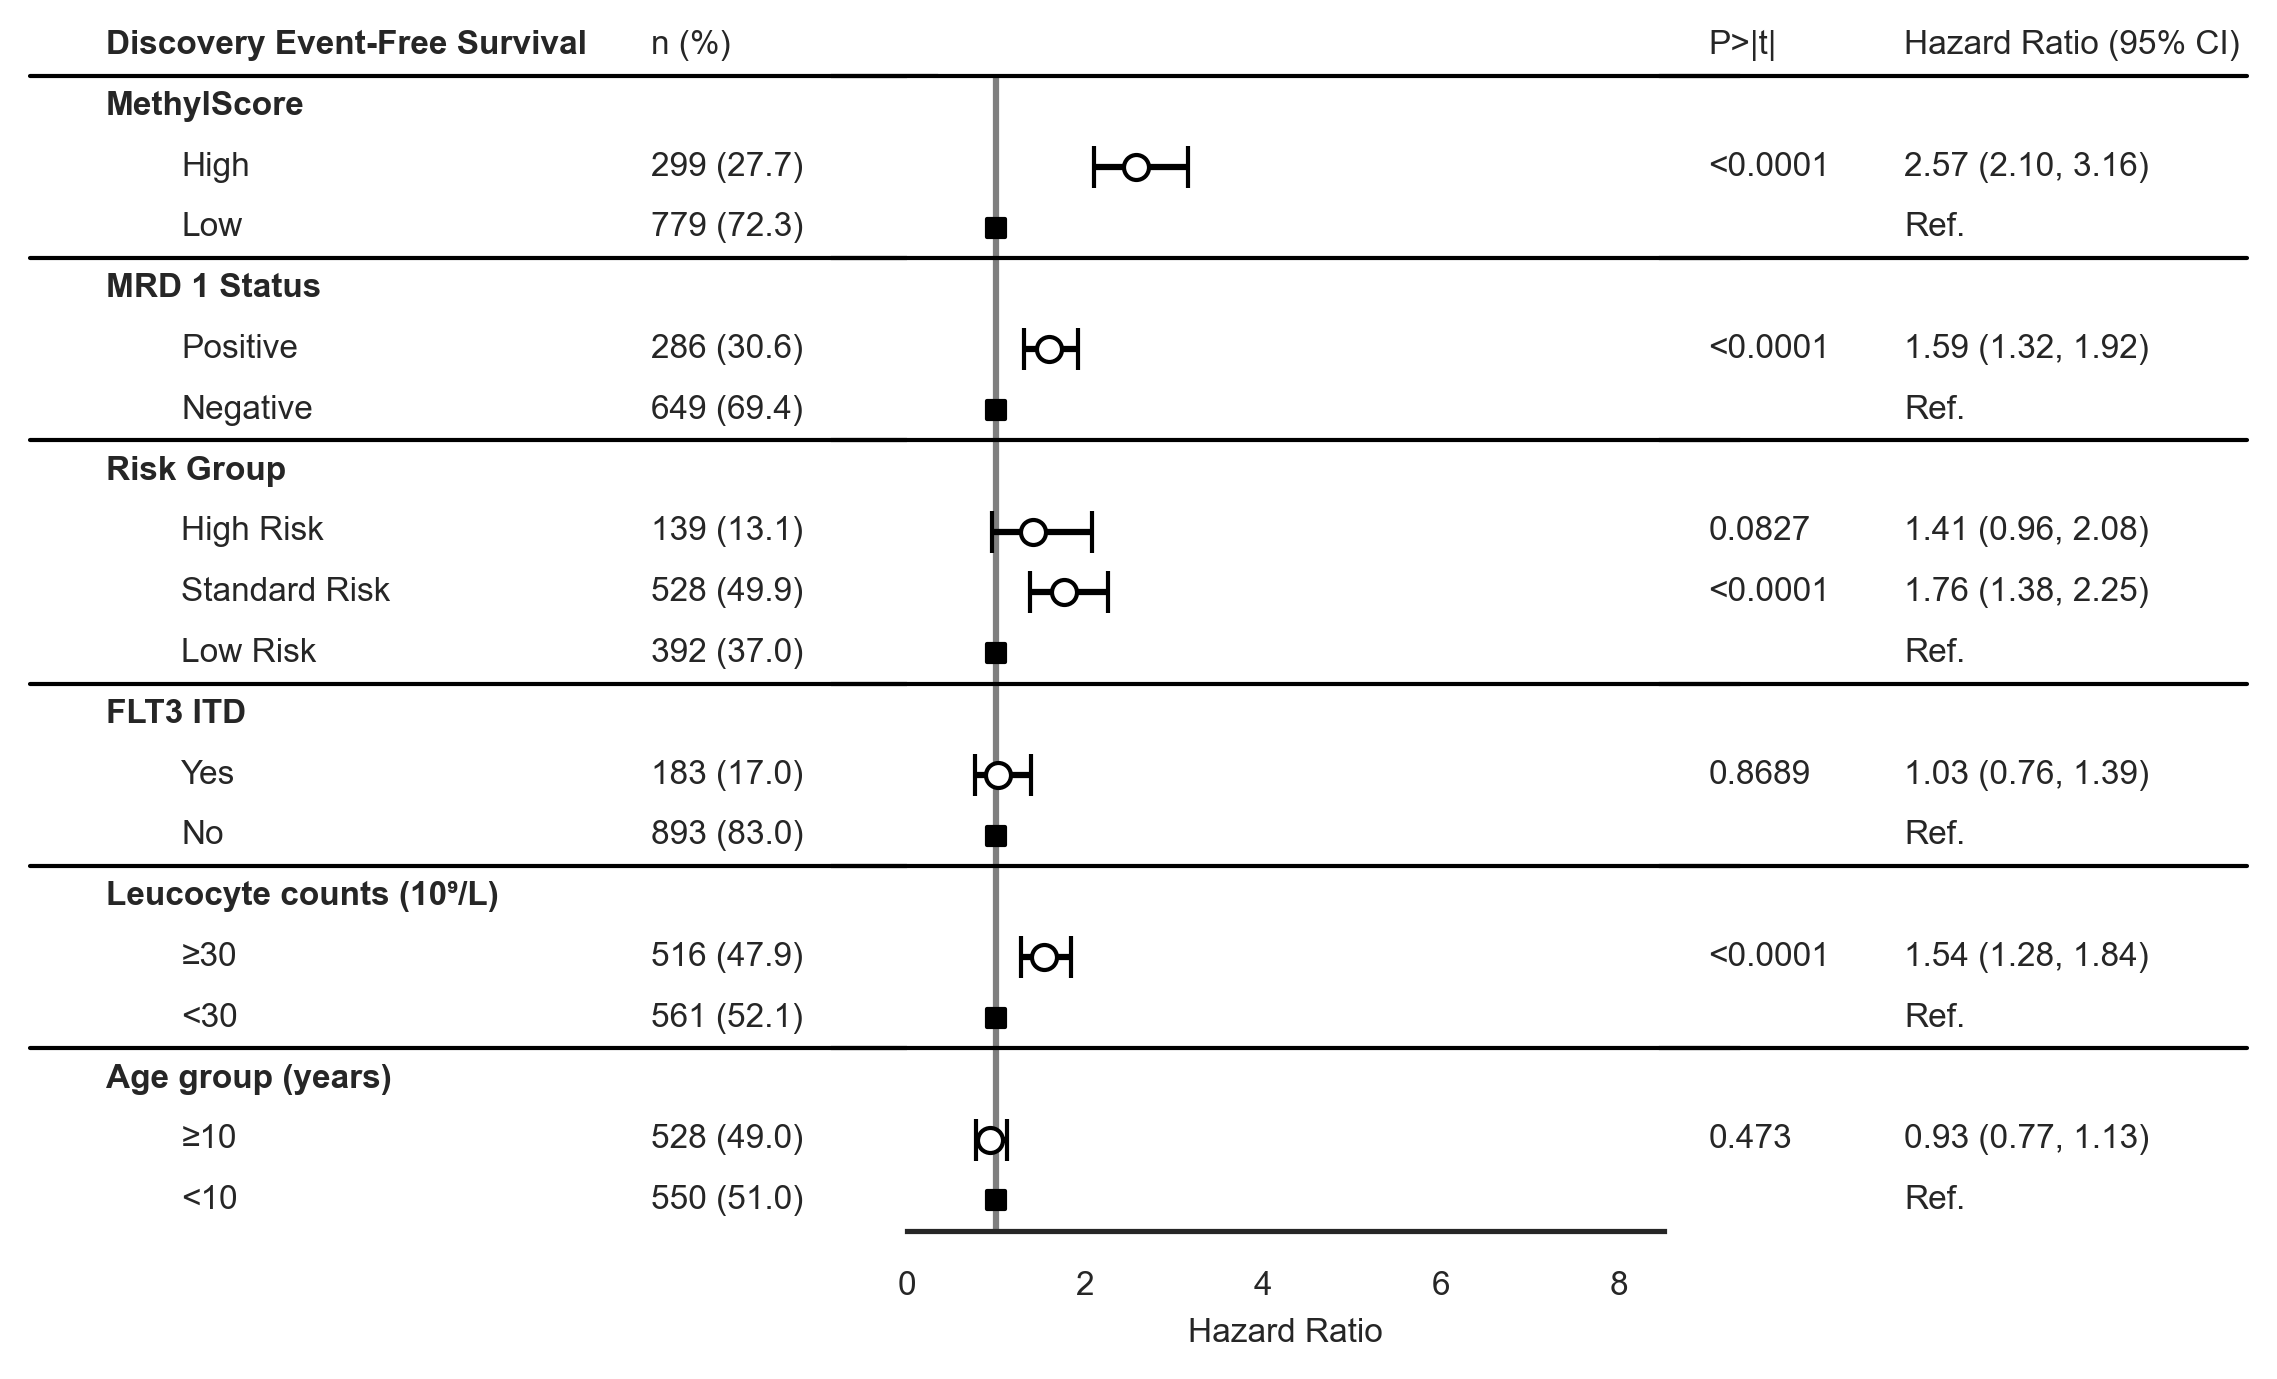

In [7]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=y_train[~y_train['Clinical Trial'].isin(['AML02','AML08','AML05'])],
                    trialname='Discovery',
                    scorename=score_name,
                    save_plot=True)
draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=y_train[~y_train['Clinical Trial'].isin(['AML02','AML08','AML05'])],
                    trialname='Discovery',
                    scorename=score_name,
                    save_plot=True)

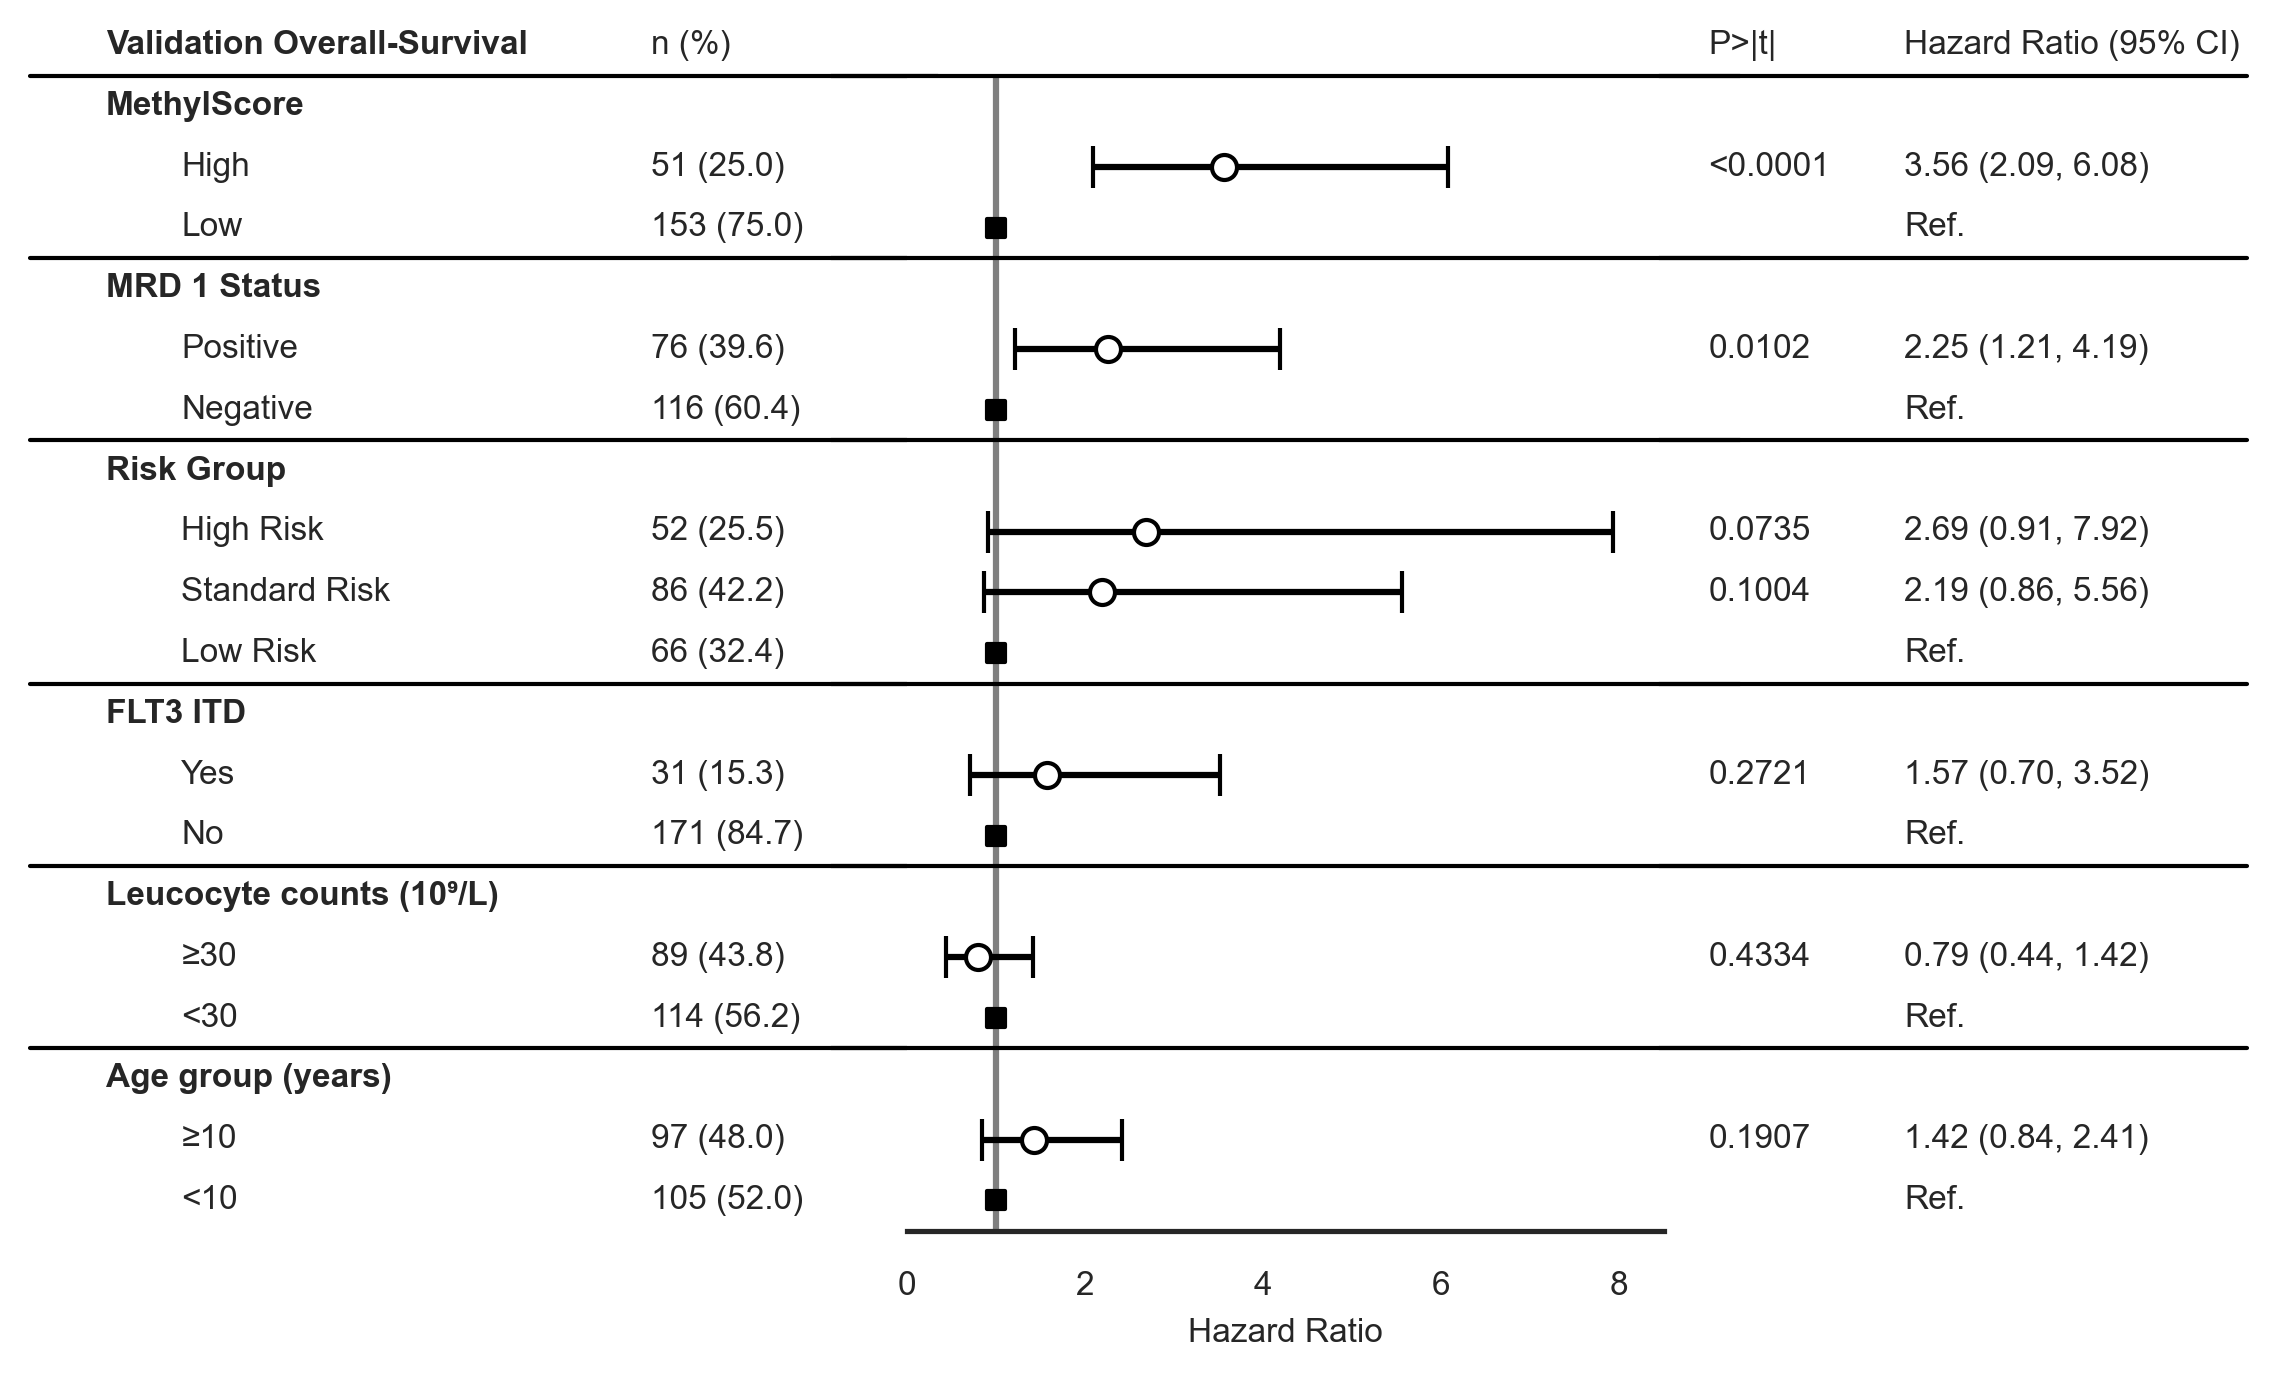

In [8]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=y_test,
                    trialname='Validation',
                    scorename=score_name,
                    save_plot=True)


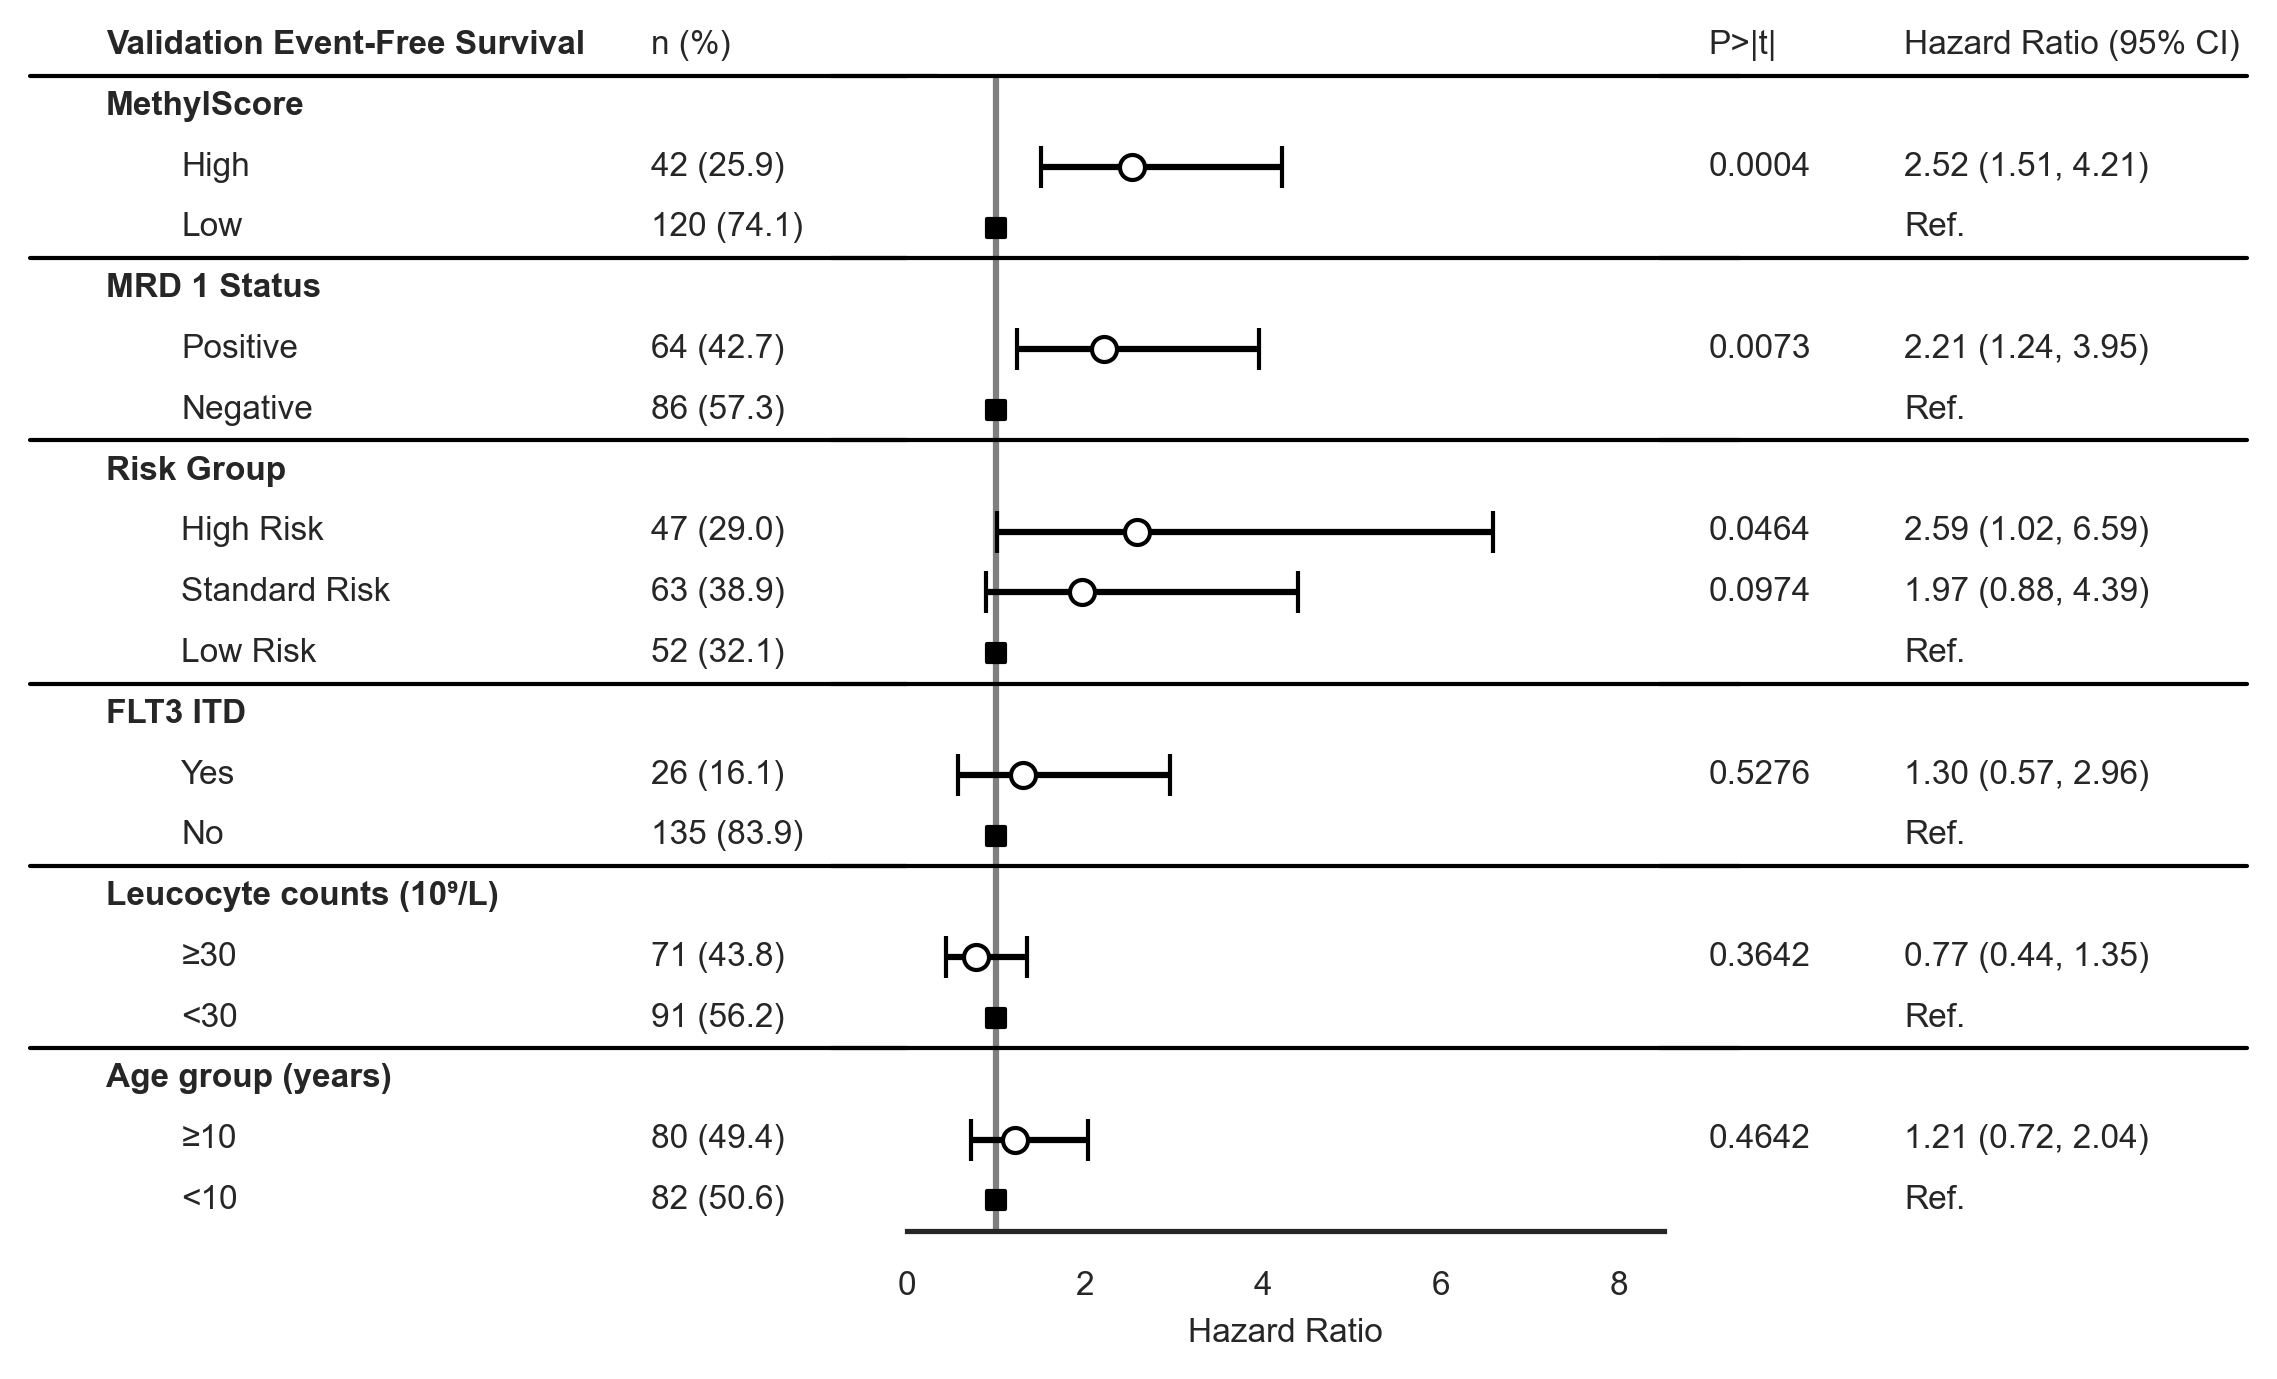

In [9]:
draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=y_test[y_test['Clinical Trial'].isin(['AML02'])],
                    trialname='Validation',
                    scorename=score_name,
                    save_plot=True)

In [10]:
from tableone import TableOne

In [11]:
df_all = pd.concat([y_train,y_test], join='outer',keys=['StJude (Validation)','COG (Discovery)']).reset_index(level=0, names='cohort')

In [12]:
columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Vital Status', 'Leucocyte counts (10⁹/L)',
            'Risk Group','FLT3 ITD']

In [13]:
mytable_all = TableOne(df_all, columns,overall=False,missing=False,pval=True,
                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby='cohort')
mytable_all.tabulate(tablefmt="html", headers=['',"",'Validation','Discovery', 'p-value'])

,,Validation,Discovery,p-value
n,,204,1093,
"Age (years), mean (SD)",,8.8 (6.0),9.4 (6.3),0.155
"Age group (years), n (%)",≥10,97 (48.0),536 (49.0),0.850
,<10,105 (52.0),557 (51.0),
"Sex, n (%)",Female,86 (42.2),546 (50.0),0.049
,Male,118 (57.8),547 (50.0),
"Race or ethnic group, n (%)",White,143 (70.8),796 (78.3),<0.001
,Black or African American,35 (17.3),117 (11.5),
,Asian,1 (0.5),64 (6.3),
,Native Hawaiian or other Pacific Islander,2 (1.0),6 (0.6),


In [14]:
columns2 = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Vital Status', 'Leucocyte counts (10⁹/L)',
            'Risk Group','FLT3 ITD','Clinical Trial']

mytable_all = TableOne(y_train, columns2,overall=True,missing=True,pval=False,
                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10'],
                                'Clinical Trial': ['AAML1031','AAML0531','AML05','AAML03P1']},
                        groupby=None)
mytable_all.tabulate(tablefmt="html", headers=['',"",'Missing','Discovery Cohort'])

,,Missing,Discovery Cohort
n,,,1093
"Age (years), mean (SD)",,0,9.4 (6.3)
"Age group (years), n (%)",≥10,0,536 (49.0)
,<10,,557 (51.0)
"Sex, n (%)",Female,0,546 (50.0)
,Male,,547 (50.0)
"Race or ethnic group, n (%)",White,77,796 (78.3)
,Black or African American,,117 (11.5)
,Asian,,64 (6.3)
,American Indian or Alaska Native,,5 (0.5)


In [15]:
mytable_all = TableOne(y_test, columns2,overall=True,missing=True,pval=False,
                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10'],
                                'Clinical Trial': ['AML02']},
                        groupby=None)
mytable_all.tabulate(tablefmt="html", headers=['',"",'Missing','Validation Cohort'])

,,Missing,Validation Cohort
n,,,204
"Age (years), mean (SD)",,2,8.8 (6.0)
"Age group (years), n (%)",≥10,2,97 (48.0)
,<10,,105 (52.0)
"Sex, n (%)",Female,0,86 (42.2)
,Male,,118 (57.8)
"Race or ethnic group, n (%)",White,2,143 (70.8)
,Black or African American,,35 (17.3)
,Asian,,1 (0.5)
,Native Hawaiian or other Pacific Islander,,2 (1.0)


In [16]:
mytable_all = TableOne(y_train, columns,overall=True,missing=True,pval=False,
                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby='Clinical Trial')
mytable_all.tabulate(tablefmt="html")

,,Missing,Overall,AAML03P1,AAML0531,AAML1031,AML05,CCG2961
n,,,1093,36,508,520,15,14
"Age (years), mean (SD)",,0,9.4 (6.3),9.6 (5.4),9.5 (6.2),9.4 (6.6),9.9 (4.9),6.8 (6.0)
"Age group (years), n (%)",≥10,0,536 (49.0),19 (52.8),256 (50.4),249 (47.9),8 (53.3),4 (28.6)
,<10,,557 (51.0),17 (47.2),252 (49.6),271 (52.1),7 (46.7),10 (71.4)
"Sex, n (%)",Female,0,546 (50.0),15 (41.7),263 (51.8),252 (48.5),8 (53.3),8 (57.1)
,Male,,547 (50.0),21 (58.3),245 (48.2),268 (51.5),7 (46.7),6 (42.9)
"Race or ethnic group, n (%)",White,77,796 (78.3),24 (70.6),384 (79.2),376 (80.2),,12 (92.3)
,Black or African American,,117 (11.5),6 (17.6),51 (10.5),59 (12.6),,1 (7.7)
,Asian,,64 (6.3),2 (5.9),20 (4.1),27 (5.8),15 (100.0),
,Native Hawaiian or other Pacific Islander,,6 (0.6),2 (5.9),1 (0.2),3 (0.6),,
